# Importing Modules or libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading csv file by using read_csv 
df=pd.read_csv('loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Exploratory Data Analysis

In [3]:
#finding first 5 rows
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#finding last five rows
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
#finding number of rows and columns in the dataset
df.shape

(614, 13)

In [6]:
#finding datatype of each column
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
#statistical analysis of numerical attributes
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Observation: Here we can see that count of LoanAmount is 592 that means some of the values are missing. Same is the case for Loan_Amount_Term and Credit_History.
In ApplicantIncome and coapplicant income there is a huge difference between 75 percentile and 100 percentile. That means outliers are there.

# Preprocessing the data

In [8]:
#finding null values present in the dataset
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

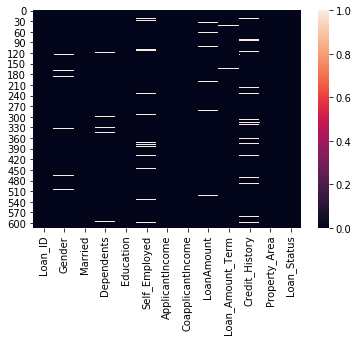

In [9]:
#visualizing null values
sns.heatmap(df.isnull())

In [10]:
#filling the null values for numerical data with their mean
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values = np.nan, strategy ='mean') 

In [11]:
df['LoanAmount']=imputer.fit_transform(df['LoanAmount'].values.reshape(-1,1))

In [12]:
df['Loan_Amount_Term']=imputer.fit_transform(df['Loan_Amount_Term'].values.reshape(-1,1))

In [13]:
df['Credit_History']=imputer.fit_transform(df['Credit_History'].values.reshape(-1,1))

In [14]:
#filling the null values for categorical data with their mode
imputer = SimpleImputer(missing_values = np.nan, strategy ='most_frequent')

In [15]:
df['Gender']=imputer.fit_transform(df['Gender'].values.reshape(-1,1))
df['Married']=imputer.fit_transform(df['Married'].values.reshape(-1,1))
df['Dependents']=imputer.fit_transform(df['Dependents'].values.reshape(-1,1))
df['Self_Employed']=imputer.fit_transform(df['Self_Employed'].values.reshape(-1,1))


In [16]:
#verifying null values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Here, we have filled all the null values

# Univariable Analysis

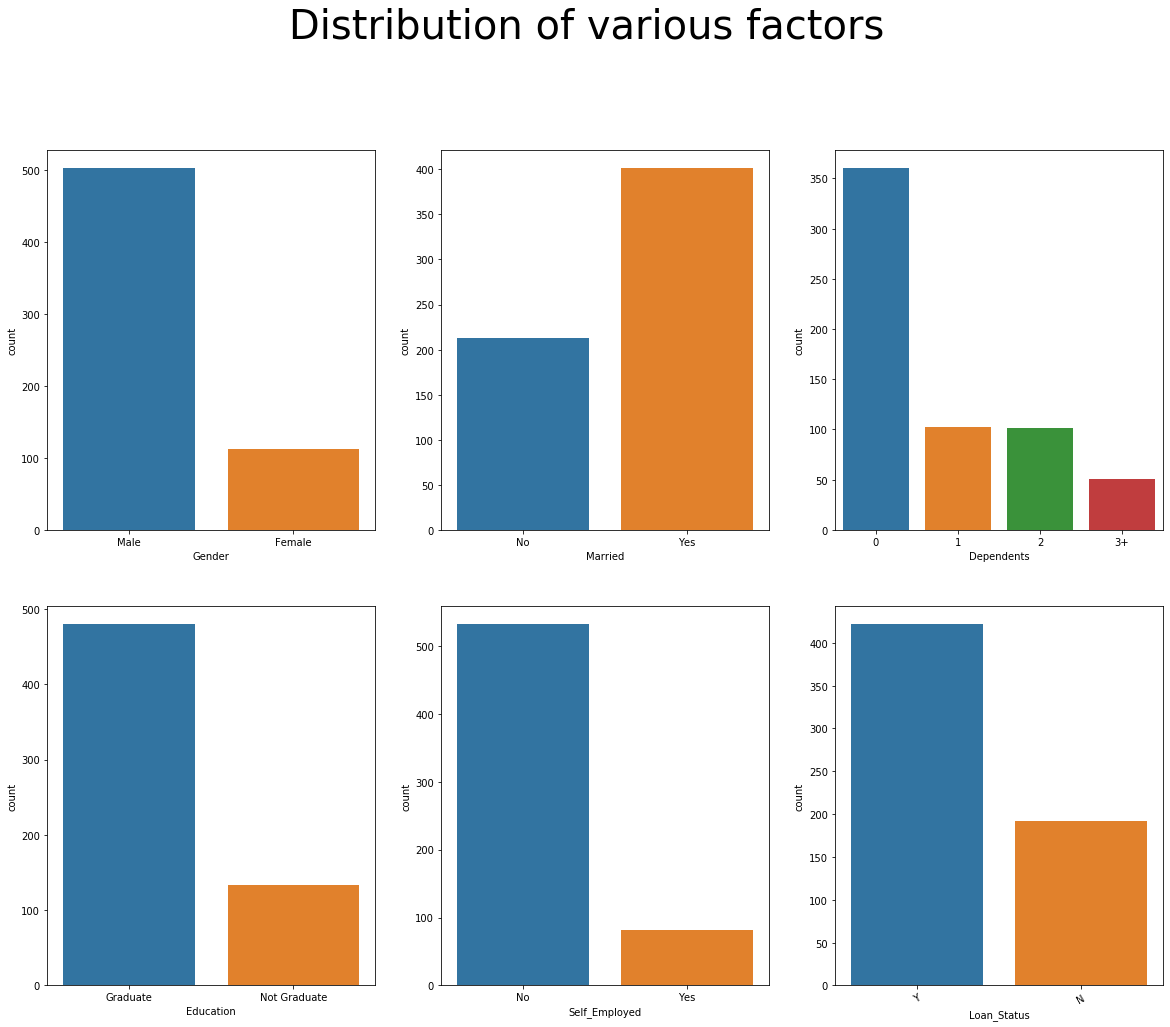

In [17]:
#categorical attributes visualization
#data visualization by countplot

fig,ax = plt.subplots(2,3, figsize=(20,20))               # 'ax' has references to all the four axes
plt.suptitle("Distribution of various factors", fontsize=40)
sns.countplot(df['Gender'], ax = ax[0,0]) 
sns.countplot(df['Married'], ax = ax[0,1]) 
sns.countplot(df['Dependents'], ax = ax[0,2]) 
sns.countplot(df['Education'], ax = ax[1,0])
sns.countplot(df['Self_Employed'], ax = ax[1,1])  
sns.countplot(df['Loan_Status'], ax = ax[1,2]) 
plt.xticks(rotation=30)
plt.subplots_adjust(bottom=0.3)
plt.show()

Observation:Here we observe that more applicant are males. Maximum number of candidates are married.
            Here 350 candidates have no dependent. That means most of the applicants have no dependents.
            Approx 480 candidates are graduates.
            Maximum of the candidates are not self employed.
            Approx 410 candidates are approved for loan. However 190 people application are not approved for loan.

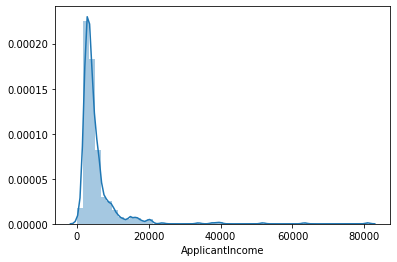

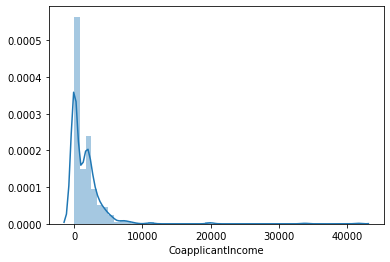

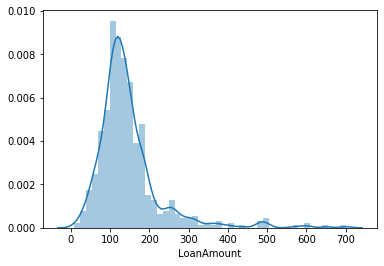

In [18]:
#visualizing distplot of each column
df1 = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
for i in df1:
    sns.distplot(df[i])
    plt.show()

Observation:Here majority of applicant have an income from 150 to 150000.
            Here majority of co-applicant have an income of 0 to 8000.
            Here majority of applicant applied for loan amount of 50 to 250(approx).
            Here we observe that these attributes are skewed.

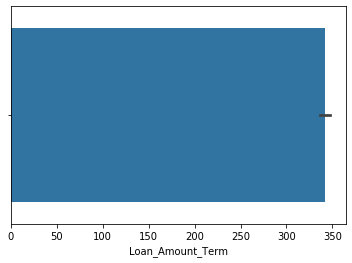

In [19]:
sns.barplot(df['Loan_Amount_Term'])
plt.show()

Observation: Here we observe that Loan_Amount_Term is also skewed.

# Bivariable Analysis

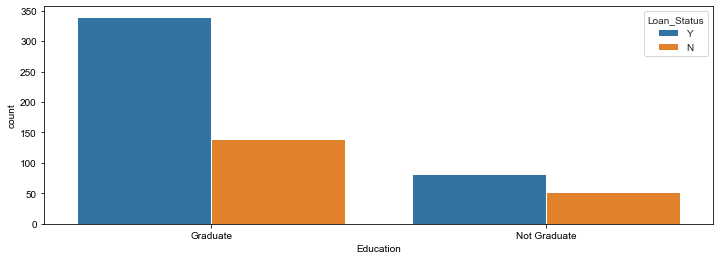

In [20]:

#Now let us visualize that how education and loan_status related to each other
plt.subplots(figsize=(12,4))
sns.set_style('whitegrid')
sns.countplot(x='Education',hue='Loan_Status',data=df)

Observation:Approx 61% application of graduates are approved. However 40% application of not graduates are approved. This shows that education plays important role in approving the loan.

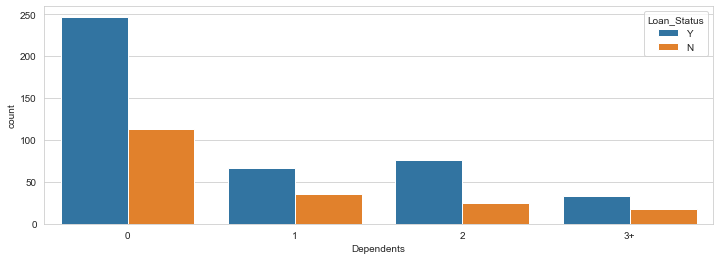

In [21]:
#Now let us visualize that how dependents and loan status are related to each other
plt.subplots(figsize=(12,4))
sns.set_style('whitegrid')
sns.countplot(x='Dependents',hue='Loan_Status',data=df)


Observation: Here we can see that approx equal number of applications are approved for applicant having no dependent or one dependent.

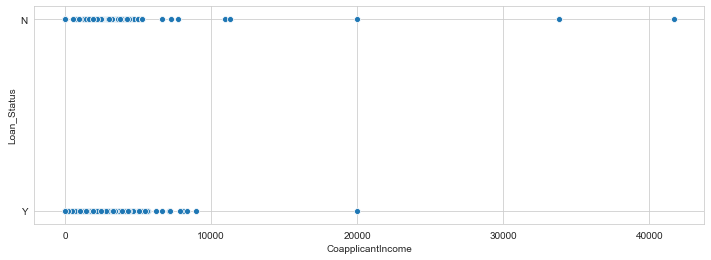

In [22]:
plt.subplots(figsize=(12,4))
sns.scatterplot(x='CoapplicantIncome',y='Loan_Status',data=df)

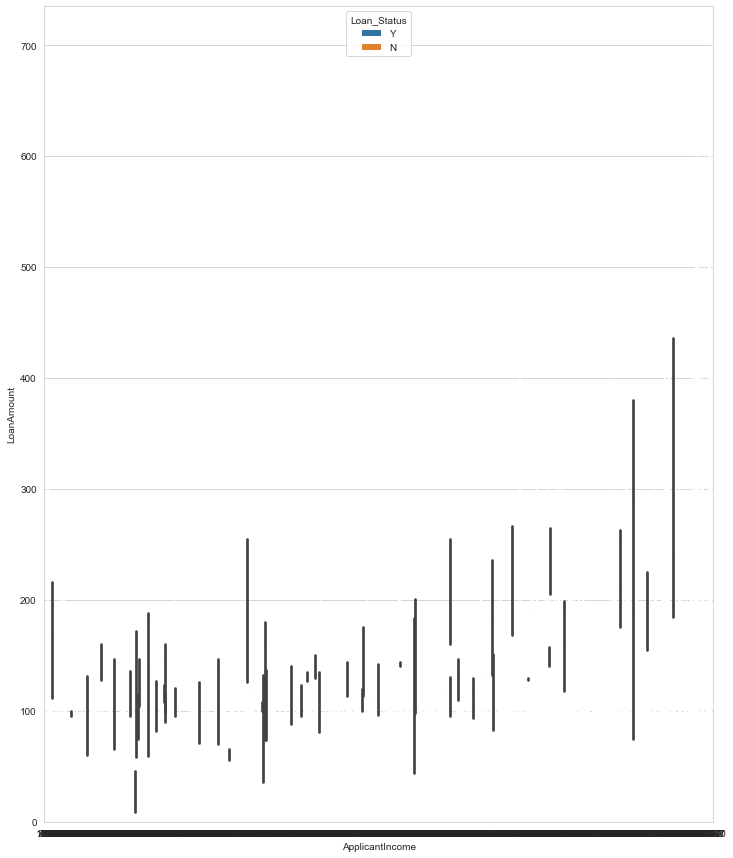

In [23]:
#visualizing relation between ApplicantIncome, LoanAmount and Loan_status are related to each other
plt.subplots(figsize=(12,15))
sns.barplot(data=df,x='ApplicantIncome',y='LoanAmount',hue='Loan_Status')

Observation: Here we can see that higher the applicant income higher the loan amount approval.

In [24]:
#finding correlation between columns
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.014477
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.001665
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.007738
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.001395
Credit_History,-0.014477,-0.001665,-0.007738,0.001395,1.000000


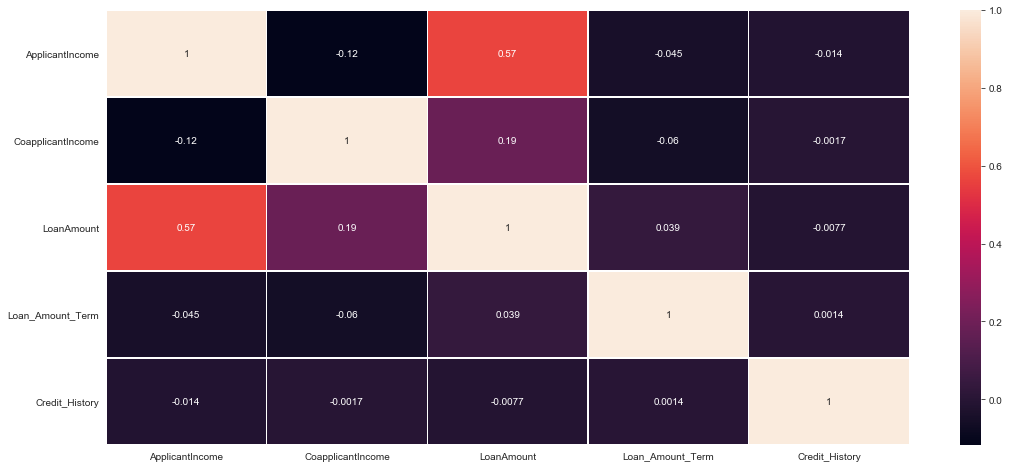

In [25]:
#visualization of correlation by using heatmap
plt.subplots(figsize=(18, 8))
sns.heatmap(df.corr(),annot=True,linewidths=.5)

Observation: Here,we can see that Loan_Amount_Term is very less correlated with other columns. So we can drop it while training our model. Even credit History is very less correlated.

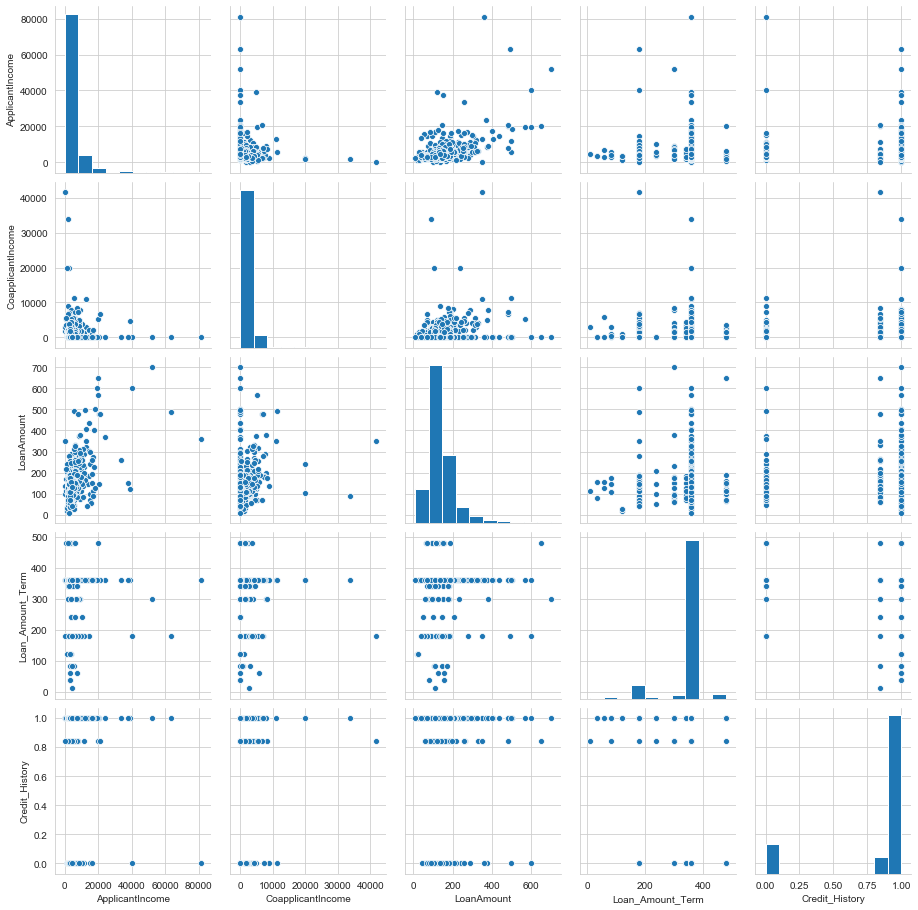

In [26]:
#visualization all the columns with each other
sns.pairplot(df)

Observation: Here we observed that data is skewed.

In [27]:
#As loan amount and applicant income is similarly correlated so we can drop one of them.
df.drop(['Loan_ID','Loan_Amount_Term','LoanAmount'],axis=1,inplace=True)

In [28]:
#transforming the non-numeric data to numeric data by using label encoder
from sklearn.preprocessing import LabelEncoder

for col in df.columns:
    if df[col].dtype==np.number:
        continue
    df[col]=LabelEncoder().fit_transform(df[col])


In [29]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,376,0.0,1.0,2,1
1,1,1,1,0,0,306,1508.0,1.0,0,0
2,1,1,0,0,1,139,0.0,1.0,2,1
3,1,1,0,1,0,90,2358.0,1.0,2,1
4,1,0,0,0,0,381,0.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,125,0.0,1.0,0,1
610,1,1,3,0,0,275,0.0,1.0,0,1
611,1,1,1,0,0,431,240.0,1.0,2,1
612,1,1,2,0,0,422,0.0,1.0,2,1


In [30]:
df['total_income']=df['ApplicantIncome'] + df['CoapplicantIncome']

In [31]:
df.drop(['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)

In [32]:
df

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,total_income
0,1,0,0,0,0,1.0,2,1,376.0
1,1,1,1,0,0,1.0,0,0,1814.0
2,1,1,0,0,1,1.0,2,1,139.0
3,1,1,0,1,0,1.0,2,1,2448.0
4,1,0,0,0,0,1.0,2,1,381.0
...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,1,125.0
610,1,1,3,0,0,1.0,0,1,275.0
611,1,1,1,0,0,1.0,2,1,671.0
612,1,1,2,0,0,1.0,2,1,422.0


In [33]:
#dividing the data into dependent and independent variable
x=df.drop(columns=['Loan_Status'],axis=1)
y=df['Loan_Status']

In [34]:
#nomalizing the curve
#transforming the data to reduce skewness
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
x=scale.fit_transform(x)


In [35]:
#importing models and metrics from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [36]:
#finding best randomstate for train test split
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=accuracy_score(y_test,y_pred)
        print("accuracy score corresponding to",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max accuracy score corresponding to",final_r_state,"is",max_r_score)  
    return final_r_state

In [37]:
#finding best random state
from sklearn.linear_model import LogisticRegression
regr=LogisticRegression()
r_state=maxr2_score(regr,x,y)

accuracy score corresponding to 42 is 0.7886178861788617
accuracy score corresponding to 43 is 0.8211382113821138
accuracy score corresponding to 44 is 0.8292682926829268
accuracy score corresponding to 45 is 0.7723577235772358
accuracy score corresponding to 46 is 0.8373983739837398
accuracy score corresponding to 47 is 0.8130081300813008
accuracy score corresponding to 48 is 0.7642276422764228
accuracy score corresponding to 49 is 0.8211382113821138
accuracy score corresponding to 50 is 0.7886178861788617
accuracy score corresponding to 51 is 0.8455284552845529
accuracy score corresponding to 52 is 0.8211382113821138
accuracy score corresponding to 53 is 0.7723577235772358
accuracy score corresponding to 54 is 0.8373983739837398
accuracy score corresponding to 55 is 0.7317073170731707
accuracy score corresponding to 56 is 0.8373983739837398
accuracy score corresponding to 57 is 0.8048780487804879
accuracy score corresponding to 58 is 0.8130081300813008
accuracy score corresponding to

In [38]:
#dividing the data into train and test by using train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=63)

In [39]:
#Importing models for classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Hyperparameter tunning by using GridSearchCV

In [40]:
#parameters for knn
neighbors={"n_neighbors":range(1,20)}
knc=KNeighborsClassifier()
gknc=GridSearchCV(knc,neighbors,cv=10)
gknc.fit(x,y)
gknc.best_params_

{'n_neighbors': 13}

In [41]:
#parameters for random forest
rfc = RandomForestClassifier()
param_grid = {
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

grid = GridSearchCV(rfc, param_grid, n_jobs=-1, cv=5)

grid.fit(x, y)
grid.best_params_

{'bootstrap': True,
 'max_features': 'log2',
 'min_samples_split': 8,
 'n_estimators': 30}

In [42]:
#best parameters for AdaBoostClassifier
n_estimators={"n_estimators":range(1,25)}
adc=AdaBoostClassifier()
gadc=GridSearchCV(adc,n_estimators,cv=10)
gadc.fit(x,y)
gadc.best_params_

{'n_estimators': 8}

In [43]:
#best parameters for decisiontreeclassifier
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
dtc=DecisionTreeClassifier()    
gdtc=GridSearchCV(dtc, param_grid, cv=5)
gdtc.fit(x, y)
gdtc.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [44]:
#best parameters for support vector classifier
parameters={'kernel':('linear','poly','rbf','sigmoid'),'C':[1,10]}
svc=SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(x,y)
print(clf.best_score_)
print(clf.best_estimator_.kernel)
print(clf.best_params_)

0.809462881514061
linear
{'C': 1, 'kernel': 'linear'}


In [45]:
#best parameter for gradiantboosting classifier
n_estimators={"n_estimators":range(1,25)}
gbc=GradientBoostingClassifier()
gc=GridSearchCV(gbc,n_estimators,cv=10)
gc.fit(x,y)
gc.best_params_

{'n_estimators': 5}

In [51]:
#fitting best parameters
knc=KNeighborsClassifier(n_neighbors=13)
svc=SVC(C= 1, kernel='linear')
dtc=DecisionTreeClassifier(criterion='gini', max_depth=4)
rfc=RandomForestClassifier(bootstrap= True, max_features='log2',min_samples_split= 8,n_estimators=30)
adc=AdaBoostClassifier(n_estimators=8)
gbc=GradientBoostingClassifier(n_estimators=5)
gb=GaussianNB()
lr=LogisticRegression()

In [52]:
models=[]
models.append(('KNeighborsClassifier',knc))
models.append(('SupportVectorClassifier',svc))
models.append(('RandomForestClassifier',rfc))
models.append(('AdaBoostClassifierClassifier',adc))
models.append(('DecisionTreeClassifier',dtc))
models.append(('GaussianNB',gb))
models.append(('GradientBoostingClassifier',gbc))
models.append(('LogisticRegression',lr))

In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,auc

***************** KNeighborsClassifier **********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')


Accuracy_score= 0.8455882352941176


Cross_val_score= 0.8095716552088842


roc_auc_score= 0.753766851704996


classification_report
               precision    recall  f1-score   support

           0       0.88      0.54      0.67        39
           1       0.84      0.97      0.90        97

    accuracy                           0.85       136
   macro avg       0.86      0.75      0.78       136
weighted avg       0.85      0.85      0.83       136



[[21 18]
 [ 3 94]]




No handles with labels found to put in legend.


AxesSubplot(0.125,0.808774;0.62x0.0712264)


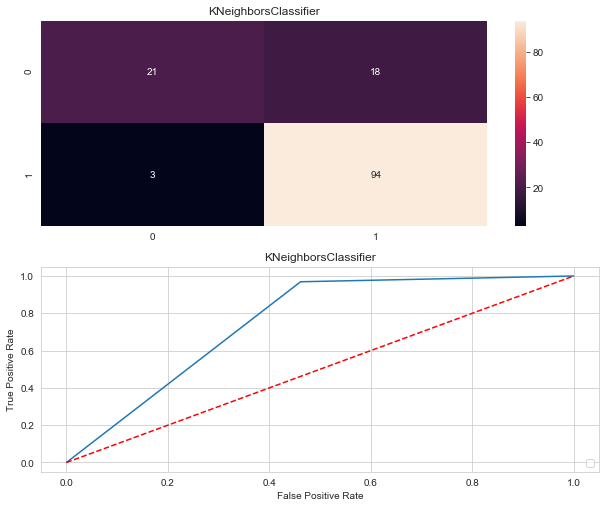




***************** SupportVectorClassifier **********************


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


Accuracy_score= 0.8676470588235294


Cross_val_score= 0.8095716552088842


roc_auc_score= 0.7692307692307692


classification_report
               precision    recall  f1-score   support

           0       1.00      0.54      0.70        39
           1       0.84      1.00      0.92        97

    accuracy                           0.87       136
   macro avg       0.92      0.77      0.81       136
weighted avg       0.89      0.87      0.85       136



[[21 18]
 [ 0 97]]




No handles with labels found to put in legend.


AxesSubplot(0.125,0.808774;0.62x0.0712264)


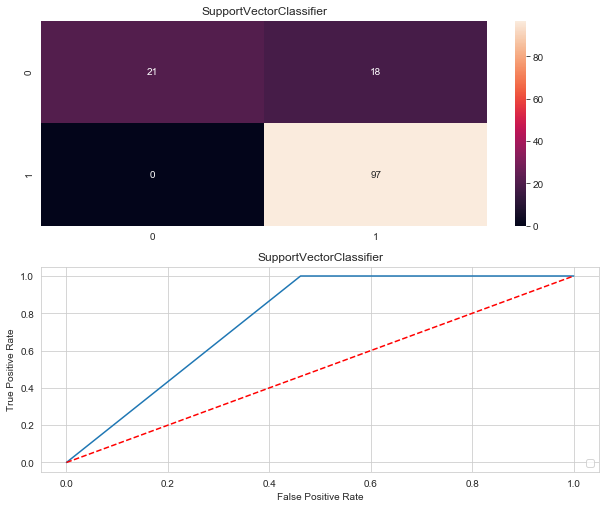




***************** RandomForestClassifier **********************


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


Accuracy_score= 0.8529411764705882


Cross_val_score= 0.7835007932310946


roc_auc_score= 0.774253238170764


classification_report
               precision    recall  f1-score   support

           0       0.85      0.59      0.70        39
           1       0.85      0.96      0.90        97

    accuracy                           0.85       136
   macro avg       0.85      0.7

No handles with labels found to put in legend.


AxesSubplot(0.125,0.808774;0.62x0.0712264)


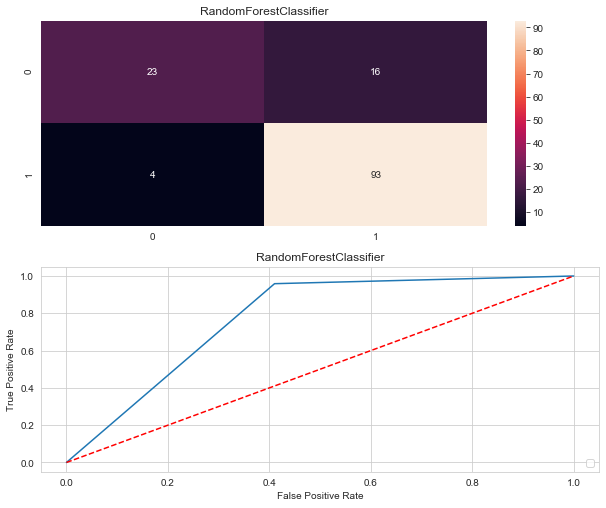




***************** AdaBoostClassifierClassifier **********************


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=8, random_state=None)


Accuracy_score= 0.8676470588235294


Cross_val_score= 0.8128503437334743


roc_auc_score= 0.7692307692307692


classification_report
               precision    recall  f1-score   support

           0       1.00      0.54      0.70        39
           1       0.84      1.00      0.92        97

    accuracy                           0.87       136
   macro avg       0.92      0.77      0.81       136
weighted avg       0.89      0.87      0.85       136



[[21 18]
 [ 0 97]]




No handles with labels found to put in legend.


AxesSubplot(0.125,0.808774;0.62x0.0712264)


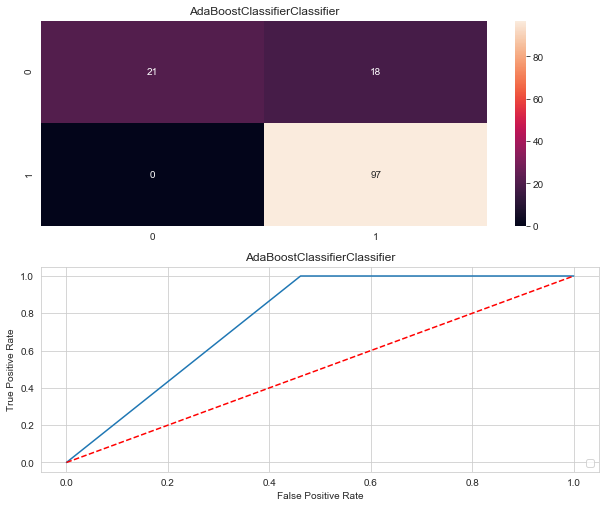




***************** DecisionTreeClassifier **********************


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


Accuracy_score= 0.8455882352941176


Cross_val_score= 0.80637228979376


roc_auc_score= 0.746100978059741


classification_report
               precision    recall  f1-score   support

           0       0.91      0.51      0.66        39
           1       0.83      0.98      0.90        97

    accuracy                           0.85       136
   macro avg       0.87      0.75      0.78       136
weighted avg       0.86      0.85      0.83       136



[[20 19]
 [ 2 95]]




No handles with labels found to put in legend.


AxesSubplot(0.125,0.808774;0.62x0.0712264)


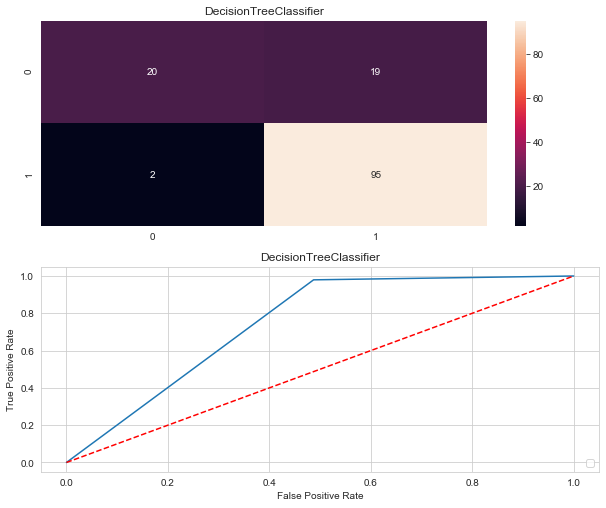




***************** GaussianNB **********************


GaussianNB(priors=None, var_smoothing=1e-09)


Accuracy_score= 0.8602941176470589


Cross_val_score= 0.804653622421999


roc_auc_score= 0.7717420037007666


classification_report
               precision    recall  f1-score   support

           0       0.92      0.56      0.70        39
           1       0.85      0.98      0.91        97

    accuracy                           0.86       136
   macro avg       0.88      0.77      0.80       136
weighted avg       0.87      0.86      0.85       136



[[22 17]
 [ 2 95]]




No handles with labels found to put in legend.


AxesSubplot(0.125,0.808774;0.62x0.0712264)


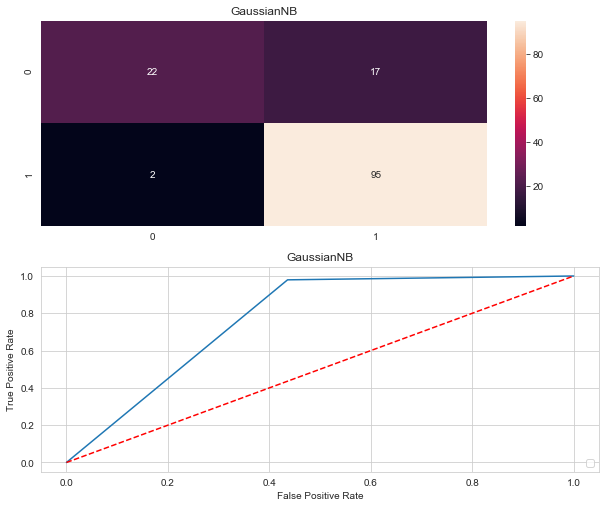




***************** GradientBoostingClassifier **********************


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=5,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


Accuracy_score= 0.8382352941176471


Cross_val_score= 0.8047329455314648


roc_auc_score= 0.717948717948718


classification_report
               precision    recall  f1-score   support

           0       1.00      0.44      0.6

No handles with labels found to put in legend.


AxesSubplot(0.125,0.808774;0.62x0.0712264)


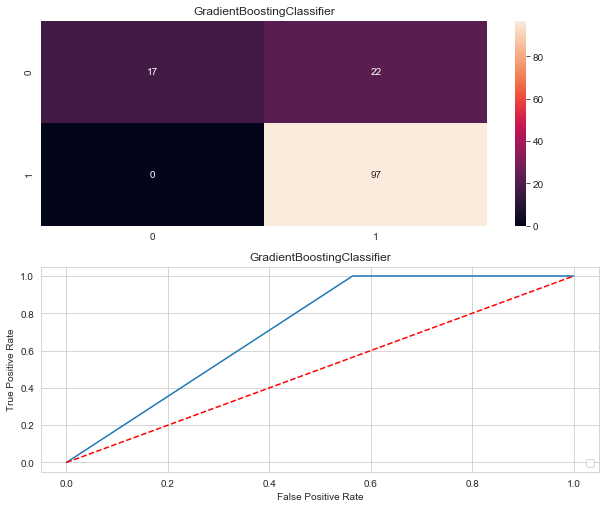




***************** LogisticRegression **********************


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy_score= 0.8676470588235294


Cross_val_score= 0.8079323109465891


roc_auc_score= 0.7692307692307692


classification_report
               precision    recall  f1-score   support

           0       1.00      0.54      0.70        39
           1       0.84      1.00      0.92        97

    accuracy                           0.87       136
   macro avg       0.92      0.77      0.81       136
weighted avg       0.89      0.87      0.85       136



[[21 18]
 [ 0 97]]




No handles with labels found to put in legend.


AxesSubplot(0.125,0.808774;0.62x0.0712264)


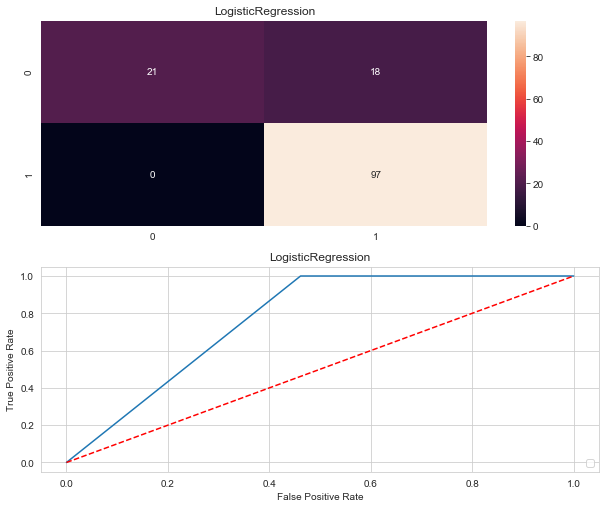

In [54]:
#appling for loop for all the algorithms and also finding its respective roc_curve
Models=[]
score=[]
cvs=[]

rocscore=[]
for name,model in models:
    print('*****************',name,'**********************')
    print('\n')
    Models.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross_val_score=',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds= roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score=',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    print('\n\n')
    

In [55]:
result=pd.DataFrame({'Model':Models,'Accuracy_score':score,'Cross_val_score':cvs,'ROC':rocscore})
result

,Model,Accuracy_score,Cross_val_score,ROC
0,KNeighborsClassifier,84.558824,80.957166,75.376685
1,SupportVectorClassifier,86.764706,80.957166,76.923077
2,RandomForestClassifier,85.294118,78.350079,77.425324
3,AdaBoostClassifierClassifier,86.764706,81.285034,76.923077
4,DecisionTreeClassifier,84.558824,80.637229,74.610098
5,GaussianNB,86.029412,80.465362,77.174200
6,GradientBoostingClassifier,83.823529,80.473295,71.794872
7,LogisticRegression,86.764706,80.793231,76.923077


In [56]:
#saving the model
from sklearn.externals import joblib
joblib.dump(svc,'loan.pkl')

['loan.pkl']